In [1]:
#Loading The datasset and Importing the Libraries
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime

import statsmodels.api as sm
    
from warnings import filterwarnings
filterwarnings("ignore")

plt.rcParams['font.family'] = 'monospace'
data = pd.read_csv("NetflixOriginals.csv",encoding = "ISO-8859-1")

In [2]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [3]:
print(len(train_set), "train +", len(test_set), "test")

467 train + 117 test


In [4]:
test_set.head()
test_set.shape

(117, 6)

In [5]:
train_set.head()
train_set.shape

(467, 6)

<Axes: >

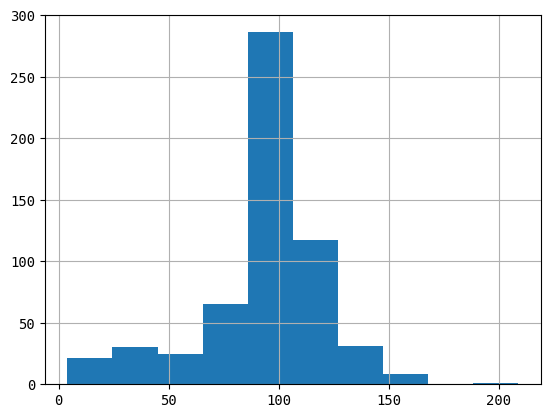

In [6]:
data["Runtime"].hist()

In [7]:
data["runtime_cat"] = np.ceil(data["Runtime"] / 20)
data["runtime_cat"].where(data["runtime_cat"] < 7, 7, inplace=True)

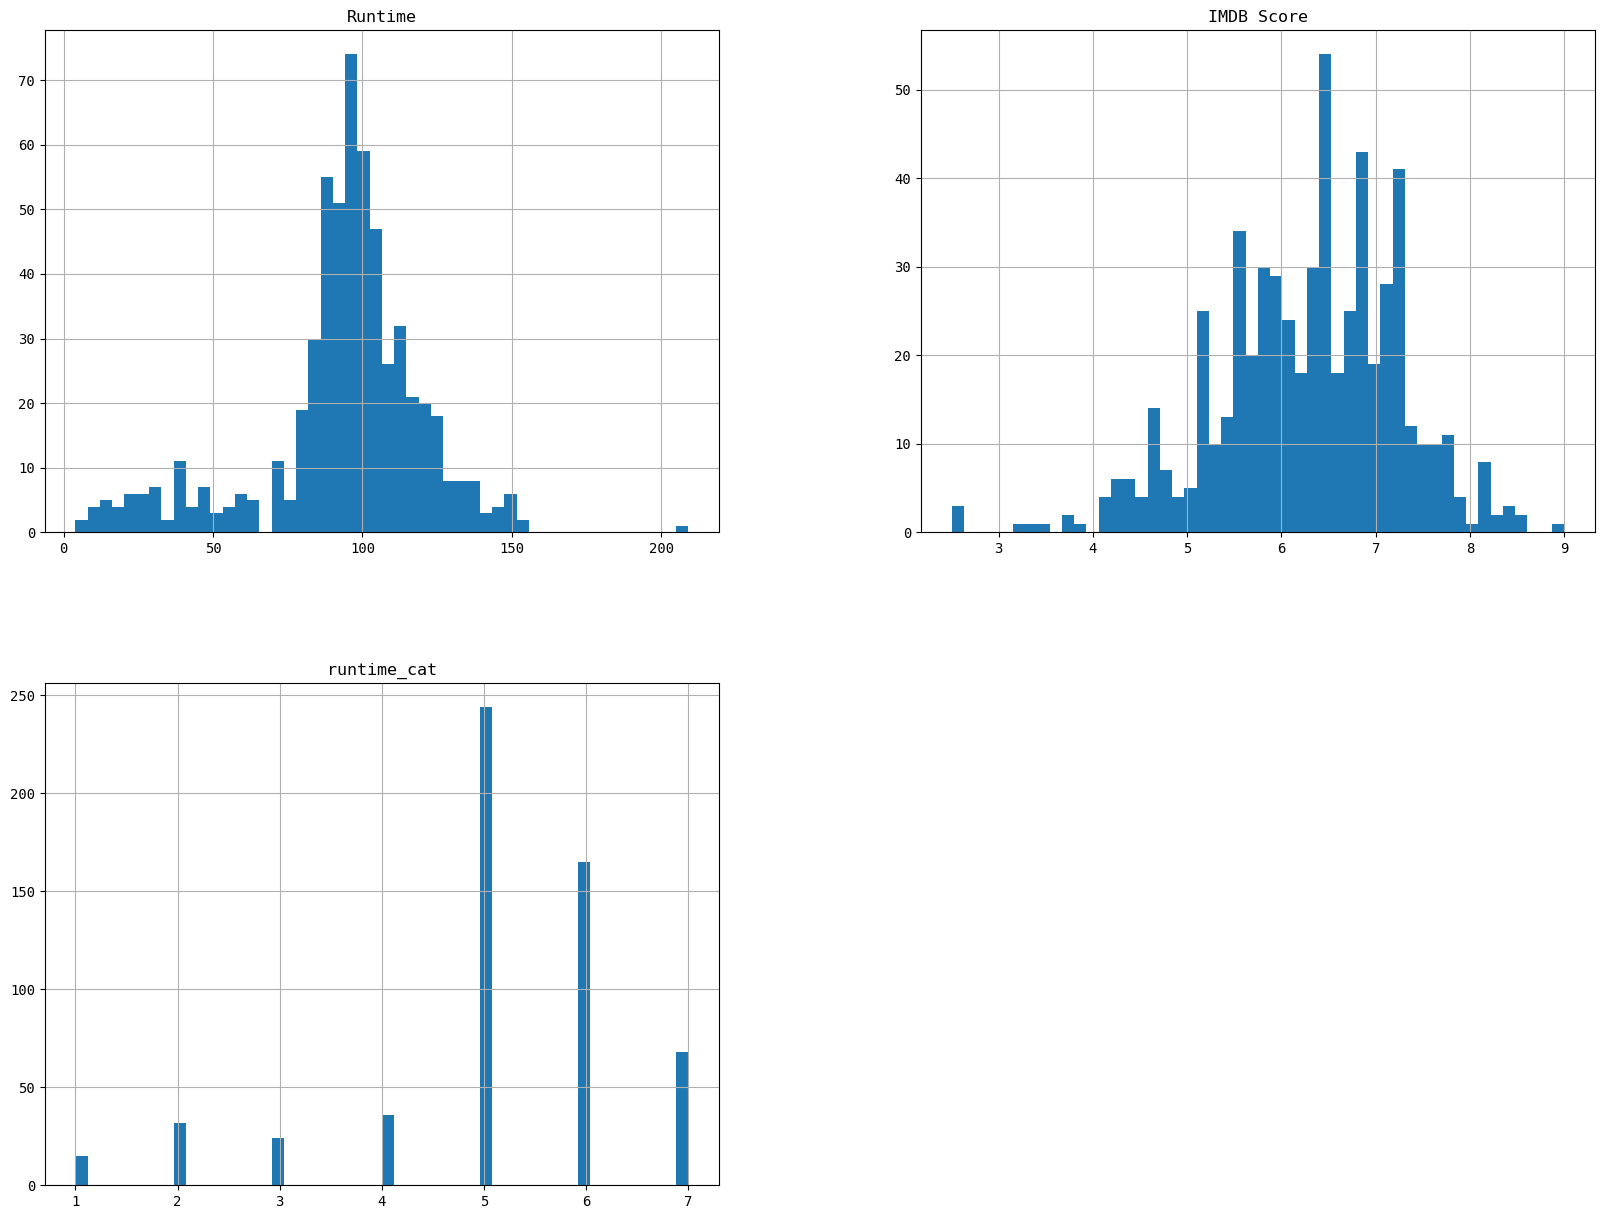

In [8]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
y = data["Runtime"]
y.head()

0    58
1    81
2    79
3    94
4    90
Name: Runtime, dtype: int64

In [10]:
X = data.loc[:,['IMDB Score','Runtime']]
X.head()

,IMDB Score,Runtime
0,2.5,58
1,2.6,81
2,2.6,79
3,3.2,94
4,3.4,90


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.10,random_state=42)


for train_index, test_index in split.split(data, data["runtime_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [12]:
print(split)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.1,
            train_size=None)


In [13]:
type(split)

sklearn.model_selection._split.StratifiedShuffleSplit

In [14]:
strat_test_set["runtime_cat"].value_counts() / len(strat_test_set)

runtime_cat
5.0    0.423729
6.0    0.288136
7.0    0.118644
4.0    0.067797
2.0    0.050847
3.0    0.033898
1.0    0.016949
Name: count, dtype: float64

<Axes: xlabel='IMDB Score', ylabel='Runtime'>

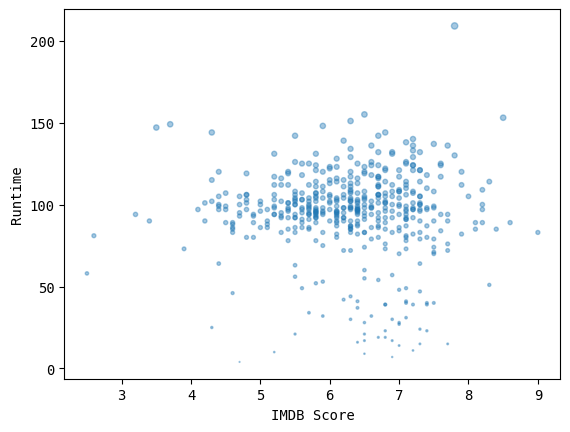

In [15]:
train_set.plot(kind="scatter", x="IMDB Score", y="Runtime", alpha=0.4, s=train_set["Runtime"]/10)

<Axes: xlabel='IMDB Score', ylabel='Runtime'>

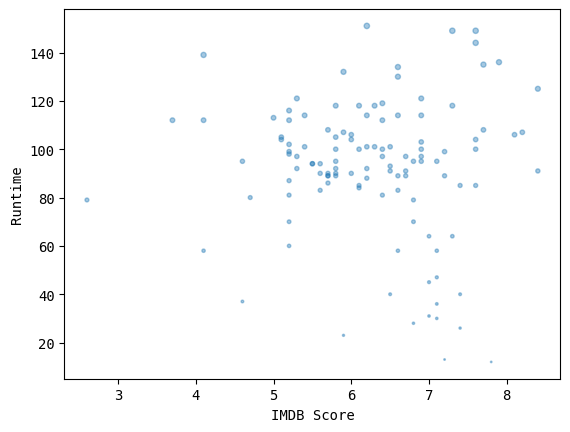

In [16]:
test_set.plot(kind="scatter", x="IMDB Score", y="Runtime", alpha=0.4, s=test_set["Runtime"]/10)

In [17]:
def genre_proportions(data):
    return data["Genre"].value_counts() / len(data)

def language_proportions(data):
    return data["Language"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)



compare_props = pd.DataFrame({
    "Overall": language_proportions(data),
    "Stratified": language_proportions(strat_test_set),
    "Random": language_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [18]:
compare_props.sort_values(by="Overall", ascending=False)

,Overall,Stratified,Random,Rand. %error,Strat. %error
Language,,,,,
English,0.686644,0.728814,0.675214,-1.664642,6.141426
Hindi,0.056507,0.050847,0.059829,5.879306,-10.015408
Spanish,0.053082,0.101695,0.051282,-3.391232,91.580098
French,0.034247,0.016949,0.017094,-50.085470,-50.508475
Italian,0.023973,0.016949,0.051282,113.919414,-29.297821
Portuguese,0.020548,NaN,0.025641,24.786325,NaN
Indonesian,0.015411,0.016949,0.025641,66.381766,9.981168
Korean,0.010274,NaN,0.008547,-16.809117,NaN
Japanese,0.010274,NaN,NaN,NaN,NaN


In [19]:
netflix = test_set.copy()
netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,runtime_cat
383,Paper Lives,Drama,"March 12, 2021",97,6.7,Turkish,5.0
422,Outlaw King,Historical-epic,"November 9, 2018",121,6.9,English,7.0
90,Things Heard & Seen,Horror,"April 29, 2021",121,5.3,English,7.0
472,ReMastered: Tricky Dick & the Man in Black,Documentary,"November 2, 2018",58,7.1,English,3.0
522,Long Shot,Documentary,"September 29, 2017",40,7.4,English,2.0


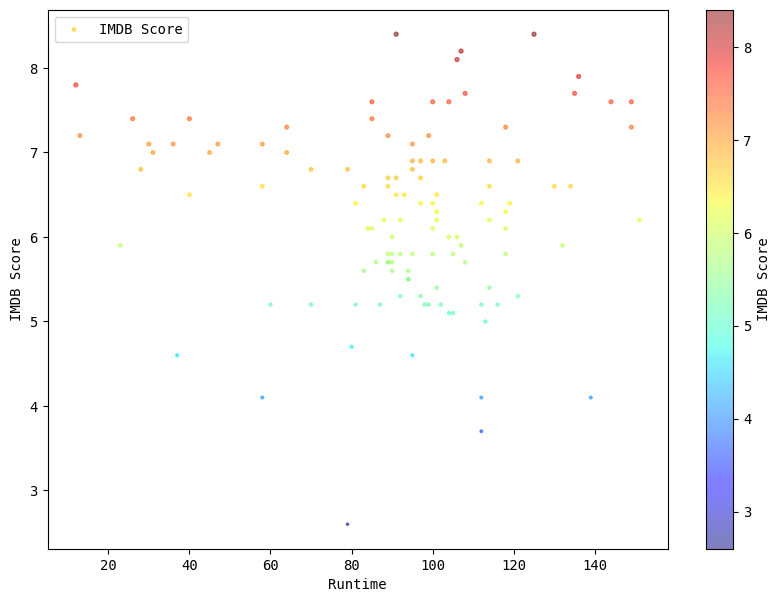

In [20]:
netflix.plot(kind="scatter", x="Runtime", y="IMDB Score", alpha=0.5,
    s=netflix["IMDB Score"], label="IMDB Score", figsize=(10,7),
    c="IMDB Score", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [21]:
netflix = strat_train_set.drop("Runtime", axis=1)
netflix_labels = strat_train_set["Runtime"].copy()

In [22]:
sample_incomplete_rows = netflix[netflix.isnull().any(axis=1)].head()
sample_incomplete_rows

,Title,Genre,Premiere,IMDB Score,Language,runtime_cat


In [23]:
median = netflix["IMDB Score"].median()
sample_incomplete_rows["IMDB Score"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,Title,Genre,Premiere,IMDB Score,Language,runtime_cat


In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [25]:
netflix_num = netflix.select_dtypes(include=[np.number])
netflix_num.head()

,IMDB Score,runtime_cat
322,6.5,5.0
245,6.2,5.0
404,6.8,4.0
91,5.3,5.0
286,6.3,5.0


In [26]:
imputer.fit(netflix_num)


SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([6.3, 5. ])

In [28]:
netflix_num.median().values

array([6.3, 5. ])

In [29]:
X = imputer.transform(netflix_num)

In [30]:
netflix_tr = pd.DataFrame(X, columns=netflix_num.columns,
                          index = list(netflix.index.values))

In [31]:
netflix_tr.loc[sample_incomplete_rows.index.values]

,IMDB Score,runtime_cat


In [32]:
imputer.strategy

'median'

In [33]:
netflix_tr = pd.DataFrame(X, columns=netflix_num.columns)
netflix_tr.head()

,IMDB Score,runtime_cat
0,6.5,5.0
1,6.2,5.0
2,6.8,4.0
3,5.3,5.0
4,6.3,5.0


In [34]:
netflix_cat = netflix['Genre']
netflix_cat.head()

322              Drama
245             Biopic
404        Documentary
91     Romantic comedy
286        Documentary
Name: Genre, dtype: object

In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [36]:
netflix_cat.describe()

count             525
unique            109
top       Documentary
freq              141
Name: Genre, dtype: object

In [37]:
ordinal_encoder = OrdinalEncoder()
netflix_cat_encoded = ordinal_encoder.fit_transform(netflix_cat.values.reshape(1,-1))
netflix_cat_encoded[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [38]:
ordinal_encoder.categories_

[array(['Drama'], dtype=object),
 array(['Biopic'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Romantic comedy'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Comedy'], dtype=object),
 array(['Romantic comedy'], dtype=object),
 array(['Comedy'], dtype=object),
 array(['Horror'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Action comedy'], dtype=object),
 array(['Anime/Fantasy'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Satire'], dtype=object),
 array(['Thriller'], dtype=object),
 array(['Romantic drama'], dtype=object),
 array(['Romantic comedy'], dtype=object),
 array(['Heist'], dtype=object),
 array(['Romantic comedy'], dtype=object),
 array(['Action'], dtype=object),
 array(['Animation/Musical/Adventure'], dtype=o

In [39]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
netflix_cat_1hot = cat_encoder.fit_transform(netflix_cat.values.reshape(1,-1))
netflix_cat_1hot

<1x525 sparse matrix of type '<class 'numpy.float64'>'
	with 525 stored elements in Compressed Sparse Row format>

In [40]:
netflix_cat_1hot.toarray()

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

In [41]:
cat_encoder = OneHotEncoder(sparse=False)
netflix_cat_1hot = cat_encoder.fit_transform(netflix_cat.values.reshape(1,-1))
netflix_cat_1hot

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

In [42]:
cat_encoder.categories_

[array(['Drama'], dtype=object),
 array(['Biopic'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Romantic comedy'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Comedy'], dtype=object),
 array(['Romantic comedy'], dtype=object),
 array(['Comedy'], dtype=object),
 array(['Horror'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Action comedy'], dtype=object),
 array(['Anime/Fantasy'], dtype=object),
 array(['Documentary'], dtype=object),
 array(['Satire'], dtype=object),
 array(['Thriller'], dtype=object),
 array(['Romantic drama'], dtype=object),
 array(['Romantic comedy'], dtype=object),
 array(['Heist'], dtype=object),
 array(['Romantic comedy'], dtype=object),
 array(['Action'], dtype=object),
 array(['Animation/Musical/Adventure'], dtype=o

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
#         ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

netflix_num_tr = num_pipeline.fit_transform(netflix_num)

In [44]:
netflix_num_tr

array([[ 0.23757285, -0.07066831],
       [-0.06812751, -0.07066831],
       [ 0.54327321, -0.79813616],
       ...,
       [ 0.54327321, -0.07066831],
       [ 0.33947297, -0.07066831],
       [-0.27192775,  0.65679955]])

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [46]:
num_attribs = list(netflix_num)
cat_attribs = ["Genre"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
#         ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ])

In [47]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [48]:
netflix_prepared = full_pipeline.fit_transform(netflix)
netflix_prepared

array([[ 0.23757285, -0.07066831,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.06812751, -0.07066831,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54327321, -0.79813616,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.54327321, -0.07066831,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33947297, -0.07066831,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.27192775,  0.65679955,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [49]:
netflix_prepared.shape

(525, 111)

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(netflix_prepared, netflix_labels)

LinearRegression()

In [51]:
some_data = netflix.iloc[:5]
some_labels = netflix_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [92.89086914 93.63818359 72.16894531 90.93139648 91.16015625]


In [52]:
print("Labels:", list(some_labels))

Labels: [93, 92, 73, 95, 87]


In [53]:
some_data_prepared

array([[ 0.23757285, -0.07066831,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [54]:
from sklearn.metrics import mean_squared_error

netflix_predictions = lin_reg.predict(netflix_prepared)
lin_mse = mean_squared_error(netflix_labels, netflix_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6.293475000571103

In [55]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(netflix_labels, netflix_predictions)
lin_mae

4.394109933035714

In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(netflix_prepared, netflix_labels)

DecisionTreeRegressor(random_state=42)

In [57]:
netflix_predictions = tree_reg.predict(netflix_prepared)
tree_mse = mean_squared_error(netflix_labels, netflix_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.7512157691858303

In [58]:
#  Fine Tune the Model

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, netflix_prepared, netflix_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [59]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 8.02670954  9.45646125 20.39510477  8.53210271  8.46336445  7.74910389
  6.33206296  8.48512399 13.07022555  7.77038434]
Mean: 9.828064345648889
Standard deviation: 3.894617838686544


In [60]:
lin_scores = cross_val_score(lin_reg, netflix_prepared, netflix_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [2.79214741e+12 1.36626179e+12 2.28397154e+12 7.95062200e+12
 1.29143566e+13 6.81048888e+00 1.25671066e+12 3.43453474e+12
 6.88288310e+12 9.11511428e+12]
Mean: 4799660216205.377
Standard deviation: 3979191358998.196


In [61]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(netflix_prepared, netflix_labels)

RandomForestRegressor(random_state=42)

In [62]:
netflix_predictions = forest_reg.predict(netflix_prepared)
forest_mse = mean_squared_error(netflix_labels, netflix_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

3.733025125742436

In [63]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, netflix_prepared, netflix_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 6.94891447  8.24939248 10.7130336   6.35097191  7.44940142  7.82164502
  5.76362246  7.20852645 12.63674427  6.7291042 ]
Mean: 7.987135628541177
Standard deviation: 2.008046940507027


In [64]:
scores = cross_val_score(lin_reg, netflix_prepared, netflix_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     4.799660e+12
std      4.194436e+12
min      6.810489e+00
25%      1.595689e+12
50%      3.113341e+12
75%      7.683687e+12
max      1.291436e+13
dtype: float64

In [65]:
from sklearn.svm import SVR

svm_reg_rbf = SVR(kernel="rbf")
svm_reg_rbf.fit(netflix_prepared, netflix_labels)
netflix_predictions = svm_reg_rbf.predict(netflix_prepared)
svm_mse = mean_squared_error(netflix_labels, netflix_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

15.516797040771639

In [66]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(netflix_prepared, netflix_labels)
housing_predictions = svm_reg.predict(netflix_prepared)
svm_mse = mean_squared_error(netflix_labels, netflix_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

15.516797040771639

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(netflix_prepared, netflix_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [69]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [70]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

11.704987015452545 {'max_features': 2, 'n_estimators': 3}
10.723853348597428 {'max_features': 2, 'n_estimators': 10}
10.416861187272573 {'max_features': 2, 'n_estimators': 30}
11.375852708917865 {'max_features': 4, 'n_estimators': 3}
10.331111302226788 {'max_features': 4, 'n_estimators': 10}
10.1513296397169 {'max_features': 4, 'n_estimators': 30}
11.030472216238604 {'max_features': 6, 'n_estimators': 3}
10.03992834023986 {'max_features': 6, 'n_estimators': 10}
9.424016266106698 {'max_features': 6, 'n_estimators': 30}
10.902059695957051 {'max_features': 8, 'n_estimators': 3}
9.806726947246082 {'max_features': 8, 'n_estimators': 10}
9.403718335140633 {'max_features': 8, 'n_estimators': 30}
12.70258662387688 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
10.977239469723768 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
12.878094994518042 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
11.178222189720122 {'bootstrap': False, 'max_features': 3, 'n_estima

In [71]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024721,0.001285,0.002754,0.001035,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-120.015160,-132.809648,...,-137.006721,31.177630,15,-33.494086,-43.000503,-28.965738,-38.305337,-45.767329,-37.906598,6.120575
1,0.081184,0.003957,0.005575,0.000819,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-98.347865,-100.622046,...,-115.001031,28.287483,9,-22.946538,-26.520632,-16.314530,-21.608986,-28.889669,-23.256071,4.321770
2,0.229261,0.002402,0.010986,0.001168,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-97.286149,-90.896032,...,-108.510997,28.328270,7,-23.121380,-21.591068,-18.567458,-20.862040,-19.658848,-20.760159,1.568246
3,0.023650,0.002346,0.003240,0.000324,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-126.773908,-101.629259,...,-129.410025,52.787765,14,-40.445481,-33.975474,-31.495157,-29.199491,-37.481756,-34.519472,4.040726
4,0.081760,0.004109,0.005365,0.000527,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-99.218324,-80.943472,...,-106.731861,36.444310,6,-24.274598,-23.729100,-18.286463,-20.069950,-22.328792,-21.737781,2.255808
5,0.236433,0.012148,0.010421,0.001204,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-93.839194,-74.620892,...,-103.049493,34.135284,5,-20.978450,-18.904143,-18.145581,-20.527690,-18.551597,-19.421492,1.122507
6,0.026386,0.001256,0.003254,0.000508,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-128.751201,-90.090057,...,-121.671317,22.949913,12,-39.196469,-31.565905,-37.036354,-43.263330,-35.354298,-37.283271,3.895937
7,0.082060,0.003030,0.005503,0.000542,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-101.934764,-60.853133,...,-100.800161,36.343214,4,-20.899376,-18.760046,-21.009110,-20.970209,-24.551886,-21.238125,1.863377
8,0.229491,0.005862,0.010279,0.001940,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-80.924283,-60.729171,...,-88.812083,30.933402,2,-17.352412,-17.516220,-16.995323,-18.982159,-17.352150,-17.639653,0.692515
9,0.026896,0.001500,0.003146,0.000677,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-104.660152,-101.659152,...,-118.854906,50.145513,10,-45.286893,-32.281154,-34.867122,-32.544778,-37.898323,-36.575654,4.800936


In [72]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Runtime", axis=1)
y_test = strat_test_set["Runtime"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [73]:
final_rmse

8.303732001035467

In [74]:
from scipy import stats

In [75]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([ 6.00394632, 10.09240104])

In [76]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(6.003946324145175, 10.09240104369741)

In [77]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(6.060835174764172, 10.058340184860635)